In [ ]:
## Binary classification 
## Imdb -- 50.000 registros divididos en 50% training y 50% testing, este dataset ya viene con la libreria de keras

##El dataset ya viene con las sequencias de palabras(opiniones) transformadas en sequencias de numeros

from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

## El termino num_words solo mantiene los 10.000 primeras palabras evitando las palabras raras.
#Los labels tienen valor 0 para negativo y 1 para positivo.

print(train_data[0])
print(train_labels[0])

max([max(sequence) for sequence in train_data]) ## Max index mapped to a word


In [ ]:
## Para decodificar las opiniones

word_ix = imdb.get_word_index()

reverse_word_ix = dict ( [(value, key) for(key,value) in word_ix.items()])

### Las palabras denotadas como: ' ' , caracter extrano, o comienzo de seq seran sustituidas por '!'.
dec_review = ' '.join( [reverse_word_ix.get(x - 3, '!') for x in train_data[1]])

print(dec_review)

In [ ]:
## Vamos a convertir listas en tensores, vamos a convertir las listas en vectores de dimension 10.000 con valores de 0's y 1's en base al ix que tengan.
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, seq in enumerate(sequences):
        results[i, seq] = 1.0
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [ ]:
## Vectorizar y normalizar los datasets

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
## Vamos a proceder a crear el modelo con tres capas

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

In [ ]:
## para validar nuestro entreno cogemos una muestra de 10000 datos 

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

In [ ]:
## El objeto history contendra informacion del entreno y por lo tanto podremos mostrar el loss segun las diferentes iteraciones
import matplotlib.pyplot as plt

history_dict = history.history
loss_val = history_dict['loss']

val_loss_val = history_dict['val_loss']

epochs = range(1, 20 + 1)

plt.plot(epochs, loss_val, 'bo', label='training loss')
plt.plot(epochs, val_loss_val, 'b', label='validation loss')

plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()

In [ ]:
## Para mostrar el accuracy del entreno y la validacion
acc_val = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_val, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')

plt.title('Training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()

In [ ]:
## Como se puede ver la accuracy aumenta segun las interaciones pero la loss tanto de entreno como de validacion ocurre en la cuarta iteracion dandose un claro ejemplo de overfitting. Por lo tanto lo mejor seria parar despues de 4 iteraciones

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)


In [ ]:
 ## Para predecir los valores
 model.predict(x_test)

In [18]:
## Otro ejemplo seria la clasificacion multi-clase de noticias.
## Se utilizara para este proposito el dataset de Reuters habiendo 46 clases distintas.

from keras.datasets import reuters

(train_data, train_label),(test_data, test_label) = reuters.load_data(num_words = 10000)

print(len(train_data))
print(len(test_data))

8982
2246


In [19]:
## Para decodificar las noticias

word_ix = reuters.get_word_index()

reverse_word_ix = dict([value,key] for (key,value) in word_ix.items())

decoded_news = ' '.join([reverse_word_ix.get(w - 3, '!') for w in train_data[5]])

print(decoded_news)

! the u s agriculture department estimated canada's 1986 87 wheat crop at 31 85 mln tonnes vs 31 85 mln tonnes last month it estimated 1985 86 output at 24 25 mln tonnes vs 24 25 mln last month canadian 1986 87 coarse grain production is projected at 27 62 mln tonnes vs 27 62 mln tonnes last month production in 1985 86 is estimated at 24 95 mln tonnes vs 24 95 mln last month canadian wheat exports in 1986 87 are forecast at 19 00 mln tonnes vs 18 00 mln tonnes last month exports in 1985 86 are estimated at 17 71 mln tonnes vs 17 72 mln last month reuter 3


In [21]:
## Vectorizamos y normalizamos el dataset

import numpy as np

def vectorize_seqs(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for ix, seq in enumerate(sequences):
        results[ix,seq] = 1.
    return results

x_train = vectorize_seqs(train_data)
x_test = vectorize_seqs(test_data)


In [31]:
## Para vectorizar los labels ya que se corresponde a un int mapeado directamente a un tema podemos utilizar un categorial- encoding. Es decir un vector de todo 0 excepto 1 en el lugar del indice.

"""
def lab_to_one_hot_enc(labels, dimension=46):
    results = np.zeros((len(labels),dimension))
    for ix, seq in enumerate(sequences):
        results[ix, seq] = 1.
    return results

y_train = vectorize_seqs(train_label)
y_test = vectorize_seqs(test_label)
"""

from keras.utils.np_utils import to_categorical

one_hot_train_lab = to_categorical(train_label)
one_hot_test_lab = to_categorical(test_label)

In [32]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

## Como output tenemos puesto 46 nodos es decir va a ser un vector con el indice correspondiente puesto a 1, utilizamos el metodo softmax para hacer una distribucion de la probabilidad

In [33]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
              

In [35]:
## Validando el entreno con 1000 datos

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_lab[:1000]
partial_y_train = one_hot_train_lab[1000:]

In [36]:
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size=512,
                    validation_data=(x_val,y_val))


Epoch 1/20
16/16 [==============================] - 3s 196ms/step - loss: 2.8647 - accuracy: 0.4747 - val_loss: 1.8767 - val_accuracy: 0.6390
Epoch 2/20
16/16 [==============================] - 1s 94ms/step - loss: 1.5023 - accuracy: 0.7005 - val_loss: 1.3724 - val_accuracy: 0.7070
Epoch 3/20
16/16 [==============================] - 0s 25ms/step - loss: 1.0984 - accuracy: 0.7640 - val_loss: 1.1756 - val_accuracy: 0.7510
Epoch 4/20
16/16 [==============================] - 2s 118ms/step - loss: 0.8615 - accuracy: 0.8152 - val_loss: 1.0671 - val_accuracy: 0.7740
Epoch 5/20
16/16 [==============================] - 0s 24ms/step - loss: 0.6861 - accuracy: 0.8561 - val_loss: 0.9741 - val_accuracy: 0.7940
Epoch 6/20
16/16 [==============================] - 0s 26ms/step - loss: 0.5488 - accuracy: 0.8825 - val_loss: 0.9563 - val_accuracy: 0.7990
Epoch 7/20
16/16 [==============================] - 0s 27ms/step - loss: 0.4412 - accuracy: 0.9065 - val_loss: 0.8977 - val_accuracy: 0.8110
Epoch 8/20


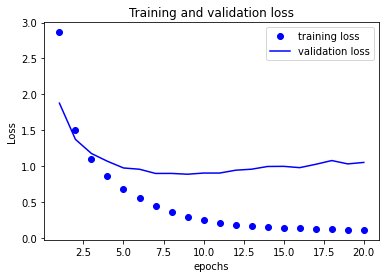

In [37]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, 21)

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

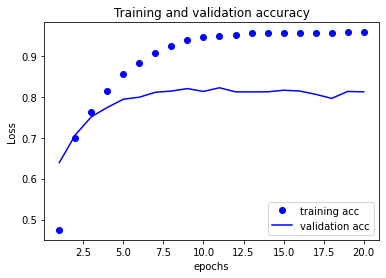

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')

plt.title('Training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [39]:
## Para generar predicciones sobre nuevos datos

predictions = model.predict(x_test)

print(predictions[0].shape)
print(np.sum(predictions[0])) ## La suma de la distribucion deberia siempre dar 1.0
print(np.argmax(predictions[0])) ## Y el idx del topico mas probable 


(46,)
0.9999999
3


In [ ]:
###  En caso de elegir un modelo distinto con menos nodos en la capa intermediaria(menos de 46), puede resultar en un problema ya que hay menos nodos para representar la informacion y se daria un bottleneck. Al usar por ejemplo 4 nodos en la segunda capa daria un accuracy de 71%.


In [77]:
## Problema de regresion -- para predecir un valor continuo en vez de uno concreto.
## Para ello utilizariamos el dataset de boston housing para estimar el valor de una casa en Boston segun los impuestos, porcentaje de delincuencia,etc..

from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

print(train_data.shape)
print(test_data.shape)


(404, 13)
(102, 13)


In [79]:
## As the data has different representation we will need to convert it to a heterogenous data. With each feature we will extract the mean of the feature and divide it by their std.

mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

train_data -= mean
train_data /= std

test_data -= mean
test_data /= std


In [80]:
## Red pequena con solo dos capas
from keras import layers
from keras import models

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
        input_shape=(train_data.shape[1],)))

    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse',                metrics=['mae'])

    return model
### No es necesaria una funcion de activacion ya que es una capa lineal ya que con esto obtendrias un valor entre 0 y 1 y nosotros queremos un valor continuo


In [83]:
## Vamos a intentar dividir el dataset en uno de entreno y otro de validacion pero al tener un dataset pequeno es posible que haya una varianza alta para el dataset de validacion y por lo tanto no seria factible.
##Para ello se utilizara k-fold cross-validation dividiendo el dataset en K particiones, entrenando el modelo con K-1 particiones y validandolo con el que queda.

import numpy as np

K = 4

num_val_samples = len(train_data) // K
num_epochs = 500
all_mae_histories = []


for i in range(K):
    print('Fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) *        num_val_samples]

    val_targets = train_targets[i * num_val_samples: (i +       1) * num_val_samples]

    if i == 0:
        partial_train_data = train_data[num_val_samples:]
        partial_train_targets = train_targets                       [num_val_samples:]
    else:

        partial_train_data = np.concatenate(
            [train_data[:i * num_val_samples],
                train_data[(i + 1) * num_val_samples:]],                  axis=0)
        partial_train_targets = np.concatenate(
            [train_targets[:i * num_val_samples],
                train_targets[(i + 1) * num_val_samples:]]                , axis=0)

    model = build_model()
    history = model.fit(partial_train_data,                     partial_train_targets, validation_data=(val_data,         val_targets), epochs=num_epochs,batch_size=1,             verbose = 0)

    mae_history = history.history['val_mae']

    all_mae_histories.append(mae_history)



Fold # 0
Fold # 1
Fold # 2
Fold # 3


In [84]:
## Calcular la media mae para todos los folds de cada iteracion
average_mae_history = [ np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]



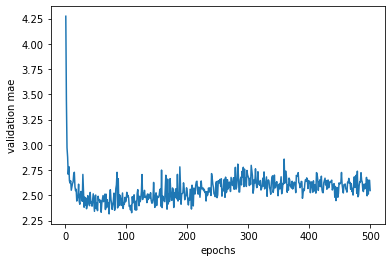

In [86]:
## Mostrar los resultados de la validacion segue el mae

import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)

plt.xlabel('epochs')
plt.ylabel('validation mae')
plt.show()


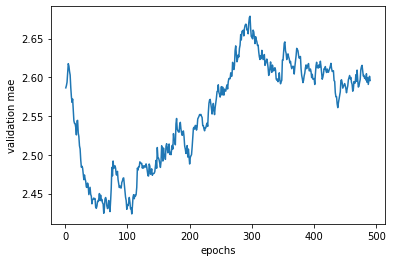

In [88]:
##Vamos a mejorar el plot ya que es un poco complicado verlo dada las escalas y las altas varianzas.
## Lo que hacemos es omitir los 10 primeros puntos que son a una escala distinta y sustituimos estos puntos por la media de los puntos anteriores.

def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1),smooth_mae_history)
plt.xlabel('epochs')
plt.ylabel('validation mae')
plt.show()

In [ ]:
## Vemos que nuestro mae de validacion no mejora depues de los 110-120 epochs cuando empieza a hacer over-fitting.
## Vamos a modificar el modelo con ese numero de iteraciones y modificando otros parametros.

model = build_model()
model.fit(train_data, train_targets, epochs = 120, batch_size = 16, verbose = 0)
test_mse_score, test_mae_score = model.evaluate(test_data,test_targets)